In [2]:
%matplotlib inline

In [3]:
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.signal import find_peaks_cwt
from scipy import signal, interpolate
#from scipy.interpolate import Cubic

## Import Image

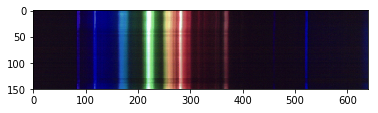

In [4]:
infile = 'data/CFL_image.png'
img = nd.imread(infile)

plt.imshow(img)

In [5]:
# read spectral data for mercury from NIST
fname = 'data/known_spectra_peaks/mercury.txt'
Hg = np.loadtxt(fname)

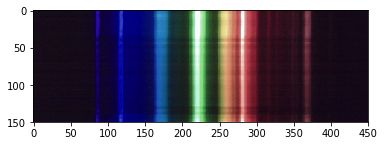

In [6]:
# take just a slice of the image.  If we sum on the columns, the 
# curve of the disc may create longer color lines.  Subsetting the
# image is a way to try and avoid this
plt.imshow(img[0:150,0:450,:])

In [7]:
# create 1d array for later use
img1d = img[0:150, 0:450, :].mean(axis=0).mean(axis=1)

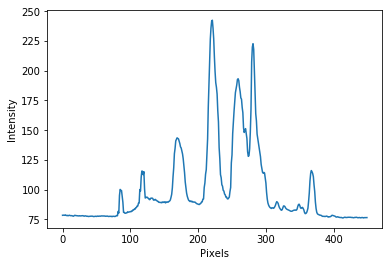

In [8]:
plt.plot(img1d)
plt.ylabel('Intensity')
plt.xlabel('Pixels')

In [9]:
# get the index of the highest peak for each color
x_red = img[0:150,0:450,0].mean(axis=0).argmax()
x_green = img[0:150,0:450,1].mean(axis=0).argmax()
x_blue = img[0:150,0:450,2].mean(axis=0).argmax()

In [10]:
x_red

279

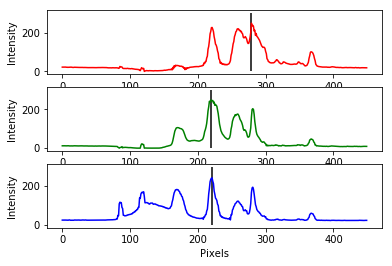

In [11]:
### average columns in each band
fig, ax = plt.subplots(3)
ax[0].plot(img[0:150,0:450,0].mean(axis=0), color='red')
ax[0].vlines(x_red, 0,300)
ax[0].set_ylabel('Intensity')
ax[1].plot(img[0:150,0:450,1].mean(axis=0), color='green')
ax[1].vlines(x_green, 0,300)
ax[1].set_ylabel('Intensity')
ax[2].plot(img[0:150,0:450,2].mean(axis=0), color='blue')
ax[2].vlines(x_blue, 0,300)
ax[2].set_ylabel('Intensity')
plt.xlabel('Pixels')

In [12]:
# The red channel doesnt have a clear peak for mercury so 
# we'll only use blue and green
x = np.array([x_green, x_red], dtype=float)
print x

[ 219.  279.]


In [13]:
# we're fittig a polynomical regression
X = np.column_stack((x,x**2))
print X

[[   219.  47961.]
 [   279.  77841.]]


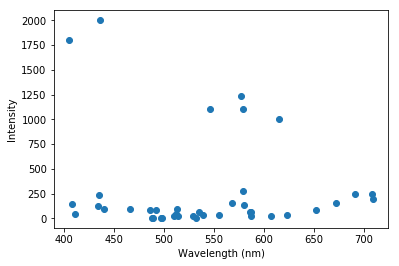

In [14]:
# known data spectra
plt.scatter(Hg[:,0]/10, Hg[:,1])
plt.ylabel('Intensity')
plt.xlabel('Wavelength (nm)')

In [15]:
# find peak values in the mercury spectra
print np.sort(Hg[Hg[:,1].argsort()][-6:,0] / 10)

[ 404.656  435.833  546.074  576.96   578.966  614.95 ]


In [16]:
y = np.array([435.833, 614.95])

In [17]:
X[:,1]

array([ 47961.,  77841.])

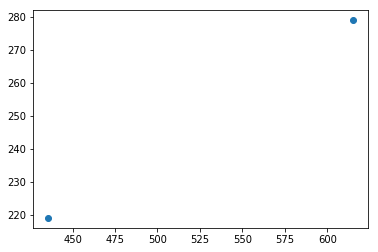

In [18]:
plt.scatter(y,X[:,0])

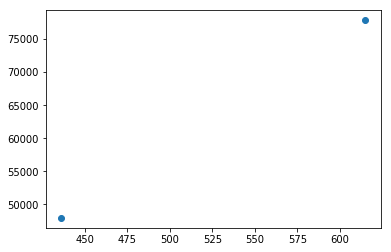

In [19]:
plt.scatter(y,X[:,1])

In [20]:
# Fit and summarize OLS model
mod = sm.OLS(y,X)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Fri, 31 Mar 2017   Prob (F-statistic):                nan
Time:                        16:33:52   Log-Likelihood:                 53.093
No. Observations:                   2   AIC:                            -102.2
Df Residuals:                       0   BIC:                            -104.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.2089        inf          0        n

/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n))
/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1187: RuntimeWarning: divide by zero encountered in divide
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1187: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1195: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/statsmodels/regression/linear_mode

In [21]:
beta = res.params
def calibrate(x):
    return beta[0]*x + (beta[1]*x**2)

calibrated_index = map(calibrate, np.arange(len(img1d)))

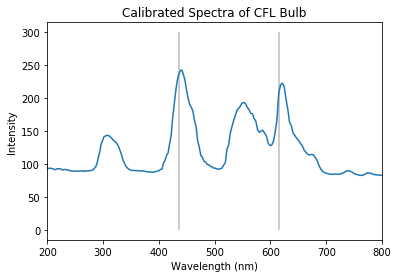

In [22]:
plt.plot(calibrated_index,img1d)
plt.xlim(200,800)
plt.vlines(y, 0, 300, lw=0.4)
plt.title('Calibrated Spectra of CFL Bulb')
plt.ylabel('Intensity')
plt.xlabel('Wavelength (nm)')